# Проверка гипотез по увеличению выручки в интернет-магазине 

## 1 Описание проекта

 Исходные данные : Вместе с отделом маркетинга был подготовлен список гипотез для увеличения выручки в крупном интернет-магазине.

Цель исследования - Приоритизация гипотез, запуск A/B-теста и анализ результатов.


## 2  Описание данных

Данные для первой части

Файл /datasets/hypothesis.csv

   * Hypothesis — краткое описание гипотезы;
   * Reach — охват пользователей по 10-балльной шкале;
   * Impact — влияние на пользователей по 10-балльной шкале;
   * Confidence — уверенность в гипотезе по 10-балльной шкале;
   * Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Данные для второй части
Файл /datasets/orders.csv

  *  transactionId — идентификатор заказа;
  *  visitorId — идентификатор пользователя, совершившего заказ;
  *  date — дата, когда был совершён заказ;
  *  revenue — выручка заказа;
  *  group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv

   * date — дата;
   * group — группа A/B-теста;
   * visitors — количество пользователей в указанную дату в указанной группе A/B-теста

Ход исследования содержит следующие шаги: 
1. Загрузка данных и подготовка их к анализу
2. Приоритизация гипотез
3. Анализ A/B-теста 


## 3 1  Загрузка данных и подготовка их к анализу 

Загрузим список библиотек, необходимых для работы 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import scipy.stats as stats
import datetime as dt 
from pandas.plotting import register_matplotlib_converters 
register_matplotlib_converters()  
plt.style.use('dark_background') 

Загрузим данные о гипотезах, заказах и посетителях из CSV-файлов в переменные.

In [2]:
# Применим конструкцию try-except и сохраним файлы о  гипотезах, заказах и посетителях.

server_path_1 = '/datasets/hypothesis.csv' 

local_path_1  = "C:\\Users\\user\\Documents\\hypothesis.csv"

server_path_2 =   '/datasets/orders.csv'

local_path_2 =  "C:\\Users\\user\\Documents\\orders.csv"

server_path_3 =   '/datasets/visitors.csv'

local_path_3  = "C:\\Users\\user\\Documents\\visitors.csv"

try:  
    df_hypothesis = pd.read_csv(server_path_1) 
    
    df_orders = pd.read_csv(server_path_2)
    
    df_visitors = pd.read_csv(server_path_3)

except: 
    
    df_hypothesis = pd.read_csv(local_path_1)
   
    df_orders = pd.read_csv(local_path_2)
 
    df_visitors = pd.read_csv(local_path_3)


 Изучим информацию о каждом из датафреймов

In [3]:
# Изучим информацию о датафрейме df_hypothesis
df_hypothesis 
pd.set_option('max_colwidth', 200) 
df_hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
# Изучим общую информацию о датафрейме df_hypothesis
df_hypothesis.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


     Всего в таблице 5 столбцов и 9 строк.  4 столбца с целочисленным типом данных int64 и 1 столбец со строковым типом данных object. Общий объем данных составляет 488 байтов. 

In [5]:
# Приведем названия столбцов к нижнему регистру
df_hypothesis = df_hypothesis.rename(columns = {'Hypothesis': 'hypothesis','Reach':'reach', 'Impact': 'impact', 'Confidence' : 'confidence'
                    ,'Efforts': 'efforts'})


In [6]:
# Узнаем количество строк в датафрейме
len(df_hypothesis) 

9

In [7]:
# Проверим таблицу на наличие пропущенных значений 
df_hypothesis.isna().sum()

hypothesis    0
reach         0
impact        0
confidence    0
efforts       0
dtype: int64

В таблице нет пропущенных значений. 

In [8]:
# Проверка на наличие явных дубликатов 
df_hypothesis.duplicated().sum()

0

Перейдем к изучению датафрейма df_orders, в котором содержится информация о заказах


In [9]:
# Выведем первые пять строк таблицы 
df_orders.head() 

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [10]:
# Выведем последние пять строк таблицы 
df_orders.tail()

,transactionId,visitorId,date,revenue,group
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A
1196,3936777065,2108080724,2019-08-15,202740,B


In [11]:
# Выведем 10 строк даатфрейма, отобранных случайным образом
df_orders.sample(n= 10, random_state =1)

,transactionId,visitorId,date,revenue,group
886,51443164,4278982564,2019-08-05,24744,A
1093,3894437543,276558944,2019-08-12,5050,A
801,504373597,2604012846,2019-08-05,890,B
189,4189935502,1648269707,2019-08-17,290,B
808,2344401705,366673373,2019-08-05,1460,A
480,1954636284,2600415354,2019-08-06,1530,B
202,532398042,1306302251,2019-08-23,1498,A
311,3567356314,3077396270,2019-08-24,4195,B
866,707525727,1270030113,2019-08-30,3290,B
752,237002862,1398592185,2019-08-20,390,A


In [12]:
# Посчитаем количество строк в датафрейме df_orders
len(df_orders)

1197

In [13]:
# Изучим общую информацию о датафрейме 
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


    Всего в таблице df_orders 5 cтолбцов и 1197 строк. Общий объем данных составил 46.9 килобайт.  Столбец 'date' на данный момент представлен в типе данных object. Это некорректно. Поменяем тип данных на datetime

In [14]:
df_orders['date'] = pd.to_datetime(df_orders['date'], format = '%Y-%m-%d')


In [15]:
# Проверим на изменение типа данных
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [16]:
# Найдем минимальную и максимальную дату  
print('Минимальная дата:',df_orders['date'].min())
print('Макимальная дата:',df_orders['date'].max()) 

Минимальная дата: 2019-08-01 00:00:00
Макимальная дата: 2019-08-31 00:00:00


В файле df_orders содержится информация о проведении A/B теста за август 2019 года

In [17]:
# Приведем к змеиному регистру названия столбцов для transactionId и visitorId
df_orders = df_orders.rename(columns = {'transactionId': 'transaction_Id', 'visitorId' : 'visitor_Id'})
df_orders.head()

,transaction_Id,visitor_Id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [18]:
# Проверим на наличие пропущенных значений в таблице df_orders
df_orders.isna().sum() 

transaction_Id    0
visitor_Id        0
date              0
revenue           0
group             0
dtype: int64

In [19]:
# Проверим на наличие явных дубликатов 
df_orders.duplicated().sum()  

0

Перейдем к изучению датафрейма df_visitors 

In [20]:
# Выведем первые пять строк датафрейма
df_visitors.head() 

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [21]:
# Выведем последние пять строк датафрейма 
df_visitors.tail() 

,date,group,visitors
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490
61,2019-08-31,B,718


In [22]:
# Выведем случайным образом 10 строк таблицы 
df_visitors.sample(n=10, random_state=1)   

,date,group,visitors
21,2019-08-22,A,609
52,2019-08-22,B,650
38,2019-08-08,B,654
24,2019-08-25,A,621
2,2019-08-03,A,507
41,2019-08-11,B,721
60,2019-08-30,B,490
50,2019-08-20,B,560
35,2019-08-05,B,707
44,2019-08-14,B,746


In [23]:
# Посчитаем количество строк 
len(df_visitors)  

62

In [24]:
# Изучим общую информацию о датафрейме 
df_visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


    Всего в таблице 3 столбца и 62 строки. Общий объем данных составил 1.6 килобайт. Для столбца date указан неверный тип данных. Поменяем его на datetime.

In [25]:
df_visitors['date'] = pd.to_datetime(df_visitors['date'], format = '%Y-%m-%d')  

In [26]:
# Проверка на изменение типа данных 
df_visitors.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [27]:
# Найдем минимальную и максимальную дату 
print('Минимальная дата:',df_visitors['date'].min()) 
print('Максимальная дата:',df_visitors['date'].max())  

Минимальная дата: 2019-08-01 00:00:00
Максимальная дата: 2019-08-31 00:00:00


Таким образом, в файле df_visitors содержатся сводные данные о результатах проведения A/B тестирования за август 2019 года 

In [28]:
# Проверка на наличие пропущенных значений 
df_visitors.isna().sum()  

date        0
group       0
visitors    0
dtype: int64

In [29]:
# Проверкка на наличие явных дубликатов 
df_visitors.duplicated().sum() 

0

Выводы по Загрузке данных и подготовке к анализу: 

* была изучена общая информация о каждом из датафреймов: df_hypothesis, df_orders, df_visitors; 

* была произведена проверка на наличие  пропущенных значений и дубликатов, в каждом из трех датасетов отсутствуют пропуски и дубликаты; 

* для столбца date в таблице df_orders и df_visitors поменяли тип данных на datetime; 

* преобразовали названия столбцов, приведя их к нижнему регистру и к "змеиному" регистру; 

* определили, что в нашем распоряжении результаты проведения A/B теста с 2019-08-01 по 2019-08-31.

В следующем шаге исследования будем приоритизировать имеющиеся гипотезы. 

##  4  2 Приоритизация гипотез 

 Чтобы принять решение о наиболее приоритетной гипотезе применим фреймворки ICE  и RICE

## 5  2.1 Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета. 

Рассчитаем для каждой из гипотез показатель ICE. Отсортируем их по убыванию приоритета.

In [30]:
df_hypothesis['ice'] = (df_hypothesis['impact'] * df_hypothesis['confidence']) / df_hypothesis['efforts'] 

df_hypothesis['ice'] = df_hypothesis['ice'] 

df_hypothesis[['hypothesis', 'ice']].sort_values(by='ice',ascending = False).round(2)

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


In [31]:
ice_max = df_hypothesis['ice'].max()
ice_max

16.2

In [32]:
print('Наиболее приоритетная гипотеза N 9:', df_hypothesis.loc[8,'hypothesis']) 

Наиболее приоритетная гипотеза N 9: Запустить акцию, дающую скидку на товар в день рождения


Вывод: Максимальное значение ICE имеет гипотеза N 9: "Запустить акцию, дающую скидку на товар в день рождения". 

##  6 2.2  Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [33]:
df_hypothesis['rice'] = (df_hypothesis['reach'] *  df_hypothesis['impact'] *  df_hypothesis['confidence']) / df_hypothesis['efforts']

df_hypothesis['rice'] =  df_hypothesis['rice'] 


(df_hypothesis[['hypothesis', 'rice']].sort_values(by='rice',ascending = False)).round(2)

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


In [34]:
# Наибольшее значение RICE 
rice_max = df_hypothesis['rice'].max() 
rice_max

112.0

In [35]:
print('Наиболее приоритетная гипотеза N 8:', df_hypothesis.loc[7,'hypothesis']) 

Наиболее приоритетная гипотеза N 8: Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок


Вывод: Максимальное значение RICE имеет гипотеза N 8: "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"


## 7 2.3 Укажите, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объясните, почему так произошло.

        При добавлении компонента Reach приоритизация гипотез изменилась. Теперь значение гипотез зависит от количества пользователей, которых коснется изменение. Следовательно, приоретной гипотезой стала "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" 

Выводы по Приоритизации гипотез:  
1. Во втором шаге исследования были посчитаны показатели ICE и RICE. 
2. Наиболее приоритетной гипотезой была признана гипотеза N 8 "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"
    

## 8   Анализ A/B-теста

Проведем анализ проведенного результата A/B теста

## 9 3.1 Построим график кумулятивной выручки по группам. Сделаем выводы и предположения.

In [36]:

print(df_orders.head()) 

print(df_visitors.head())

   transaction_Id  visitor_Id       date  revenue group
0      3667963787  3312258926 2019-08-15     1650     B
1      2804400009  3642806036 2019-08-15      730     B
2      2961555356  4069496402 2019-08-15      400     A
3      3797467345  1196621759 2019-08-15     9759     B
4      2282983706  2322279887 2019-08-15     2308     B
        date group  visitors
0 2019-08-01     A       719
1 2019-08-02     A       619
2 2019-08-03     A       507
3 2019-08-04     A       717
4 2019-08-05     A       756


In [37]:
# создадим массив уникальных пар значений дат и групп теста
datesGroups = df_orders[['date','group']].drop_duplicates()  

Объявим переменную ordersAggregated, содержащую:

    *   дату;
    *   группу A/B-теста;
    *   число уникальных заказов в группе теста по указанную дату включительно;
    *   число уникальных пользователей, совершивших хотя бы 1 заказ в группе теста по указанную дату включительно;
    *   суммарную выручку заказов в группе теста по указанную дату включительно.

In [38]:
# получаем агрегированные кумулятивные по дням данные о заказах  
ordersAggregated = datesGroups.apply(lambda x: df_orders[np.logical_and(df_orders['date'] <= x['date'], df_orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transaction_Id' : 'nunique', 'visitor_Id' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [39]:
# Выведем первые 5 строк 
ordersAggregated.head()

,date,group,transaction_Id,visitor_Id,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


Объявим переменную visitorsAggregated, содержащую: 

    * дату;
    * группу A/B-теста;
    * количество уникальных посетителей в группе теста по указанную дату включительно.

In [40]:
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: df_visitors[np.logical_and(df_visitors['date'] <= x['date'], df_visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group']) 

In [41]:
# Выведем первые 5 строк
visitorsAggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


      Определим переменную cumulativeData, объединив ordersAggregated и visitorsAggregated по колонкам 'date', 'group' методом merge(). 

In [42]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']) 
cumulativeData.columns=['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [43]:
# Выведем первые пять строк датафрейма
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [44]:
# Найдем максимальную и максимальную дату 
print('Минимальная дата:', cumulativeData['date'].min())
print('Максимальная дата:', cumulativeData['date'].max())

Минимальная дата: 2019-08-01 00:00:00
Максимальная дата: 2019-08-31 00:00:00


      Минимальная и максимальная даты в датафрейме cumulativeData полностью совпадают  с минимальной и максимальной датой в исходных данных.

In [45]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А 

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueA.head()

,date,revenue,orders
0,2019-08-01,148579,24
2,2019-08-02,242401,44
4,2019-08-03,354874,68
6,2019-08-04,425699,84
8,2019-08-05,549917,109


In [46]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]  
cumulativeRevenueB.head()

,date,revenue,orders
1,2019-08-01,101217,21
3,2019-08-02,266748,45
5,2019-08-03,380996,61
7,2019-08-04,489567,78
9,2019-08-05,581995,101


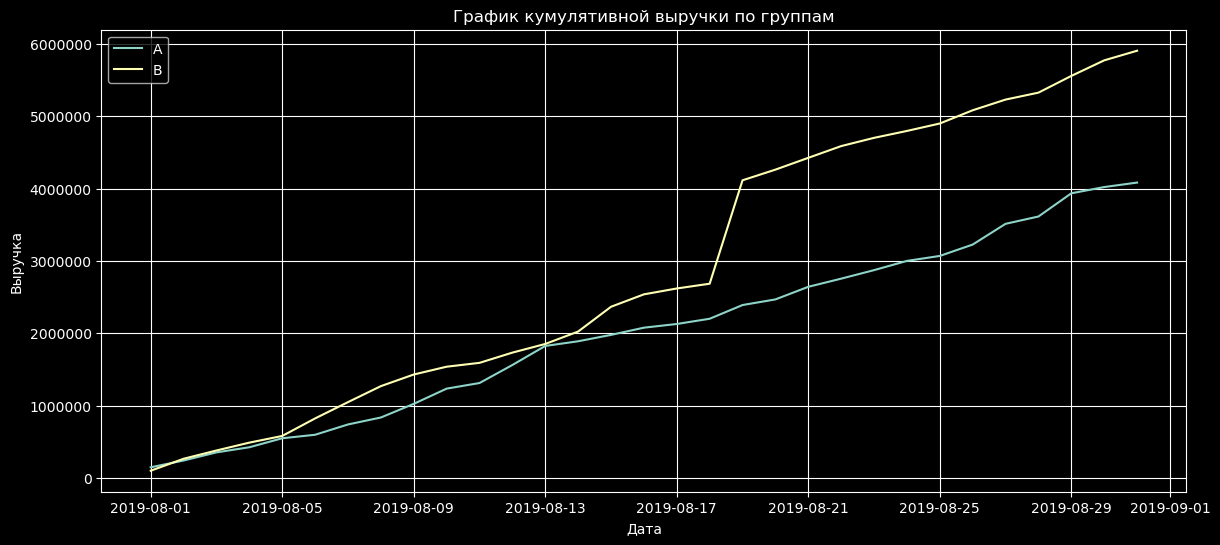

In [47]:
plt.figure(figsize=(14,6))
plt.ticklabel_format(style='plain') 

# Строим график выручки группы А 
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label = 'A')

# Строим график выручки группы B 
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label = 'B')
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.legend()  
plt.grid()
plt.show()




 По данным графика, видим, что сегмент B в середине теста вырвался в лидеры и продолжал лидировать до конца теста. Можно предположить, что аномально большие заказы влияют на результаты теста. Выручка почти равномерно увеличивается в течение всего теста. 

## 10 3.2  Построим график кумулятивного среднего чека по группам. Сделаем выводы и предположения.

Построим графики среднего чека по группам - разделим кумулятивную выручку на кумулятивное число заказов. 

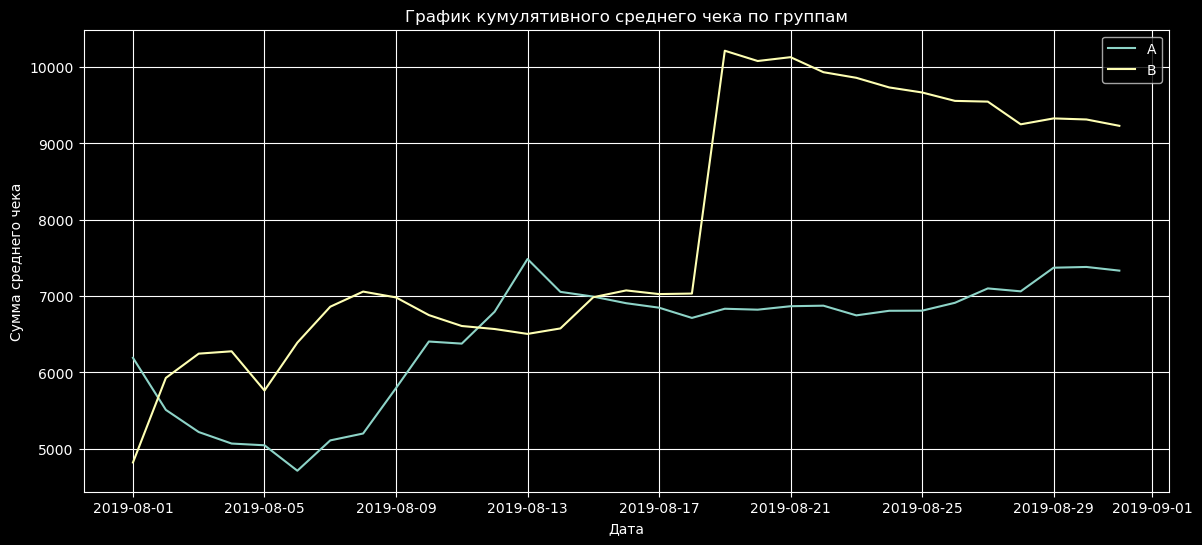

In [48]:
plt.figure(figsize=(14,6)) 
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'] / cumulativeRevenueA['orders'], label='A')  
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'] / cumulativeRevenueB['orders'], label='B')   


plt.title('График кумулятивного среднего чека по группам') 
plt.xlabel('Дата')
plt.ylabel('Сумма среднего чека')
plt.legend() 
plt.grid()
plt.show()

      Средний чек становится равномерным ближе к концу теста: установился для группы А. Для группы B средний чек начал резко увеличиваться в середине теста и затем начал равномерно падать. Предположу, что в группе B скрываются аномальные по стоимости средние чеки.

 ## 11 3.3 Построим график относительного изменения кумулятивного среднего чека группы B к группе A. Сделаем выводы и предположения. 

    Построим график относительного изменения кумулятивного среднего чека группы B к группе A.  Добавим горизонтальную ось методом axhline()

In [49]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on = 'date', right_on = 'date', how = 'left',suffixes =['A','B'])
mergedCumulativeRevenue.head(10)

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,148579,24,101217,21
1,2019-08-02,242401,44,266748,45
2,2019-08-03,354874,68,380996,61
3,2019-08-04,425699,84,489567,78
4,2019-08-05,549917,109,581995,101
5,2019-08-06,598401,127,824337,129
6,2019-08-07,740818,145,1049671,153
7,2019-08-08,837097,161,1270589,180
8,2019-08-09,1025603,177,1431401,205
9,2019-08-10,1236098,193,1539203,228


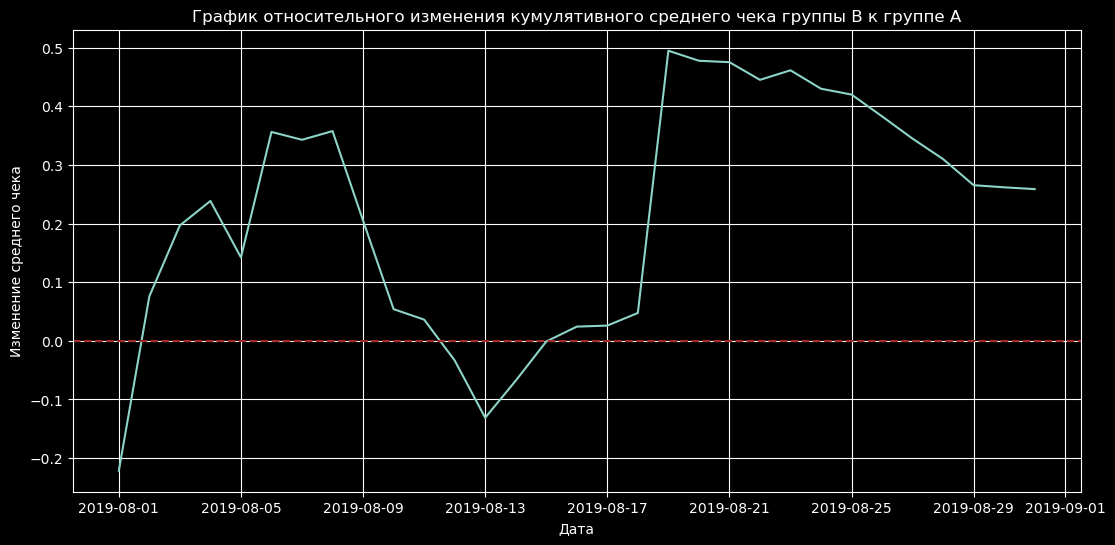

In [50]:
plt.figure(figsize=(13,6))

# строим отношение средних чеков  
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB']) / 
(mergedCumulativeRevenue['revenueA'] / mergedCumulativeRevenue['ordersA'])-1) 

# добавляем ось х 
plt.axhline(y=0, color='brown', linestyle = '--') 
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A') 
plt.xlabel('Дата')
plt.ylabel('Изменение среднего чека')
plt.grid()
plt.show()



    В нескольких точках график относительного изменения кумулятивного среднего чека между сегментами A и B резко «скачет». Скорее всего есть крупные заказы и выбросы.

## 12 3.4 Построим  график кумулятивного среднего количества заказов на посетителя по группам. Сделаем выводы и предположения.

          Аналогично проанализируем график кумулятивного среднего количества заказов на посетителя. Зададим масштаб осей методом plt.axis(). Передадим ему минимальное и максимальное значения оси x; минимальное и максимальное значения оси y — ["2019-08-01", '2019-08-31', 0, 0.6]:

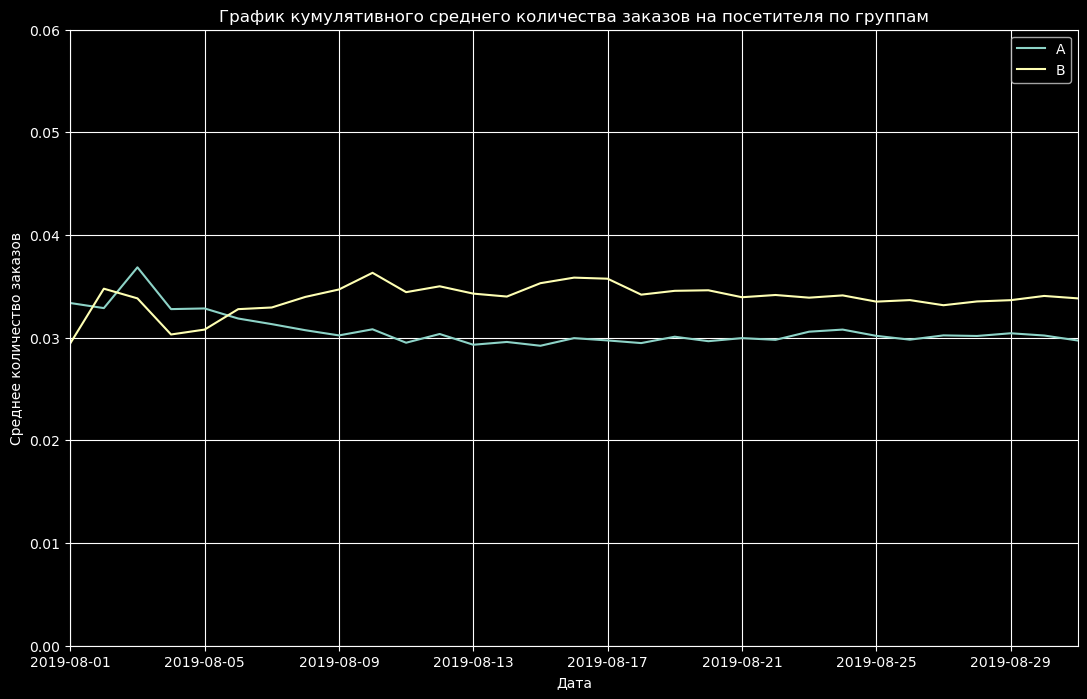

In [51]:
# считаем кумулятивное среднее количество заказов на посетителя
cumulativeData['conversion'] = cumulativeData['orders']/ cumulativeData['visitors'] 

# отделяем данные по группе А 
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A'] 

# отделяем данные по группе B 

cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B'] 

# строим графики: 
plt.figure(figsize=(13,8))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label = 'A') 
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label = 'B') 

plt.title('График кумулятивного среднего количества заказов на посетителя по группам') 
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов')
plt.axis([dt.datetime(2019,8,1), dt.datetime(2019,8,31), 0, 0.06])
plt.legend()
plt.grid()
plt.show()

    Видно, что получился практически симметричный график. В определенный момент среднее количество закакзов у группы B вырвалось вперед и продолжило лидировать до конца теста.

## 13 3.5 Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделаем выводы и предположения.

 Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

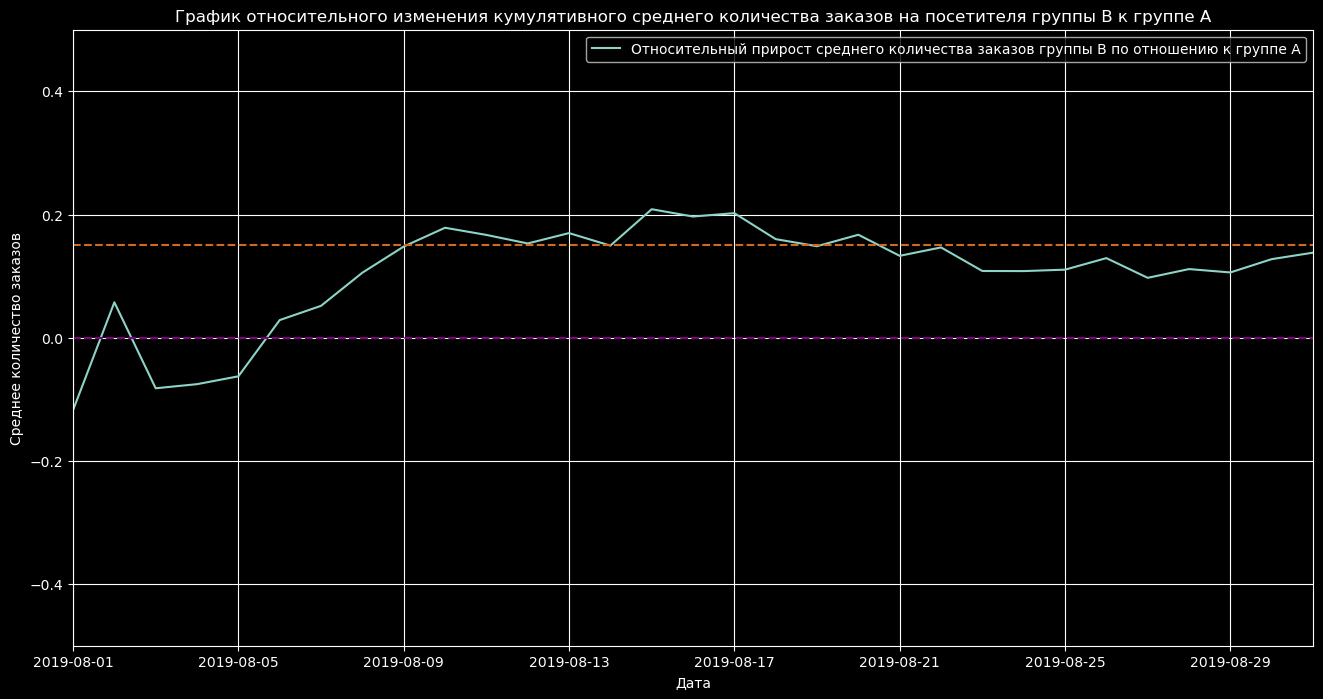

In [52]:
plt.figure(figsize=(16,8)) 
mergedCumulativeCinversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']],left_on = 'date',
                               right_on = 'date', how = 'left', suffixes = ['A','B']) 

plt.plot(mergedCumulativeCinversions['date'], mergedCumulativeCinversions['conversionB'] / mergedCumulativeCinversions['conversionA'] -1, label = 
'Относительный прирост среднего количества заказов группы B по отношению к группе A')

plt.axhline(y=0, color = 'purple', linestyle = '--') 
plt.axhline(y=0.15, color = 'chocolate', linestyle = '--')
plt.axis([dt.datetime(2019,8,1), dt.datetime(2019,8,31), -0.5, 0.5])
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A') 
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов') 

plt.legend()
plt.grid() 
plt.show()



По данным графика видим, что в начале теста группа B проигрывала группе A, но затем вырвалась вперед. Далее конверсия незначительно падала, но к концу теста снова увеличивалась.

## 14 3.6 Построим точечный график количества заказов по пользователям. Сделаем выводы и предположения.

Построим точечный график количества заказов по пользователям. 

In [53]:
ordersByUsers = (df_orders.groupby('visitor_Id', as_index=False).agg({'transaction_Id': 'nunique'})) 

ordersByUsers.columns = ['user_Id', 'orders']  

ordersByUsers.sort_values(by='orders', ascending = False).head(10)



,user_Id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


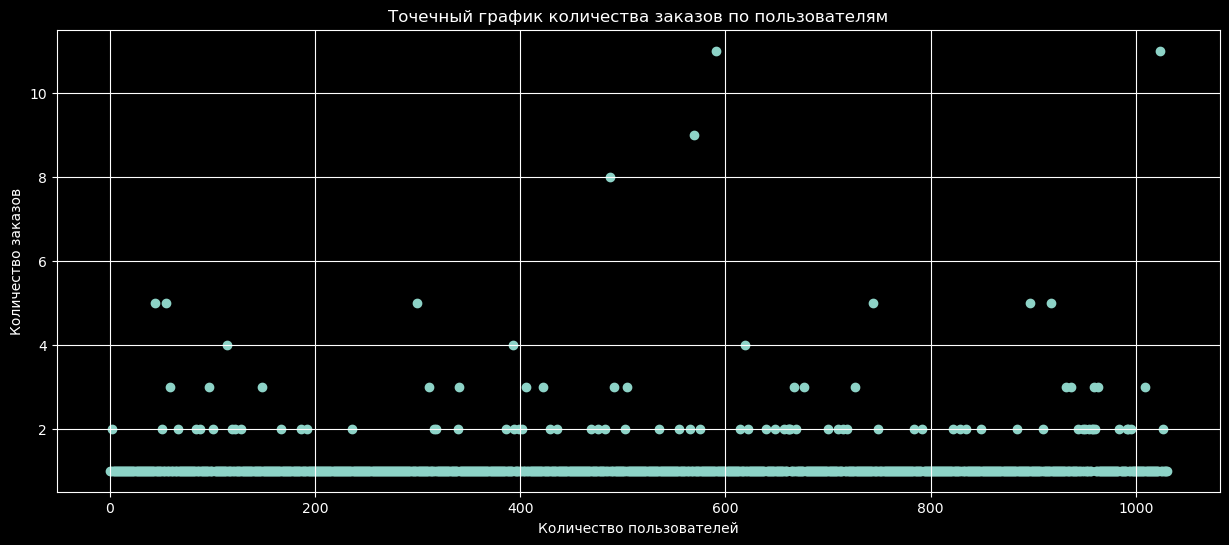

In [54]:
plt.figure(figsize = (15,6))
plt.title('Точечный график количества заказов по пользователям') 
plt.xlabel('Количество пользователей') 
plt.ylabel('Количество заказов')
plt.grid()

# серия из чисел от 0 до количества наблюдений в ordersByUsers 

x_values = pd.Series(range(0, len(ordersByUsers))) 

plt.scatter(x_values, ordersByUsers['orders']) 
plt.show() 

Большинство пользователей совершают по 1-2 заказа. Пользователей, которые совершают 2 и более заказа, довольно мало. 

## 15 3.7 Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [55]:
# метод np.percentile ('column', [percentile1, percentile2]) находит перцентили. 

print(np.percentile(ordersByUsers['orders'], [95,99]))

[2. 4.]


Не более 5 % совершали больше двух заказов и не более 1 % пользователей больше 4 заказов. Определим аномальных пользователей, которые совершают 4 заказов и более.

##   16 3.8  Построим точечный график стоимостей заказов. Сделаем выводы и предположения.

Построим точечный график стоимостей заказов. 

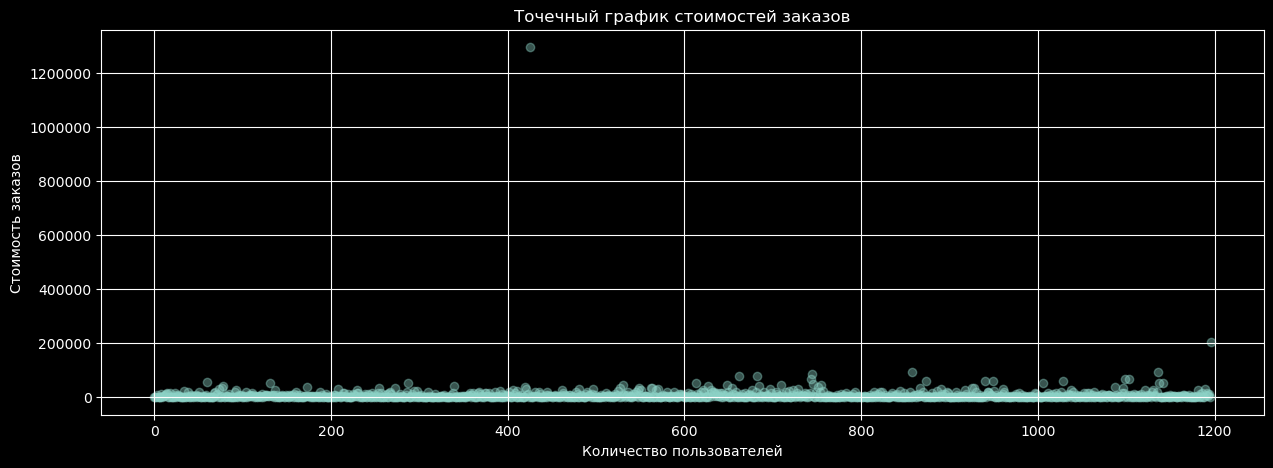

In [56]:
plt.figure(figsize=(15,5)) 
plt.grid()
plt.title('Точечный график стоимостей заказов') 
plt.xlabel('Количество пользователей')
plt.ylabel('Стоимость заказов')
plt.ticklabel_format(style='plain')  

# серия из чисел от 0 до количества наблюдений в df_orders

x_values = pd.Series(range(0,len(df_orders['revenue'])))

plt.scatter(x_values, df_orders['revenue'], alpha = 0.4) 
plt.show()



     Видим, что большинство заказов сосредоточились до 200000 рублей, однако на графике есть два аномальных выброса. Один в районе 200000 рублей, второй - свыше 1200000 рублей. Таким образом, будем считать выбросами заказы стоимостью свыше 200000 рублей.

In [57]:
 # посмотрим на топ-5 самых дорогих заказов 
df_orders['revenue'].sort_values().tail()

744       86620
1136      92550
858       93940
1196     202740
425     1294500
Name: revenue, dtype: int64

Первое аномальное значение - это заказ стоимостью 1294500 рублей, второй выброс это заказ стоимостью 202740 рублей.

Построим точечный график стоимостей заказов, отфильтровав аномальные значения 

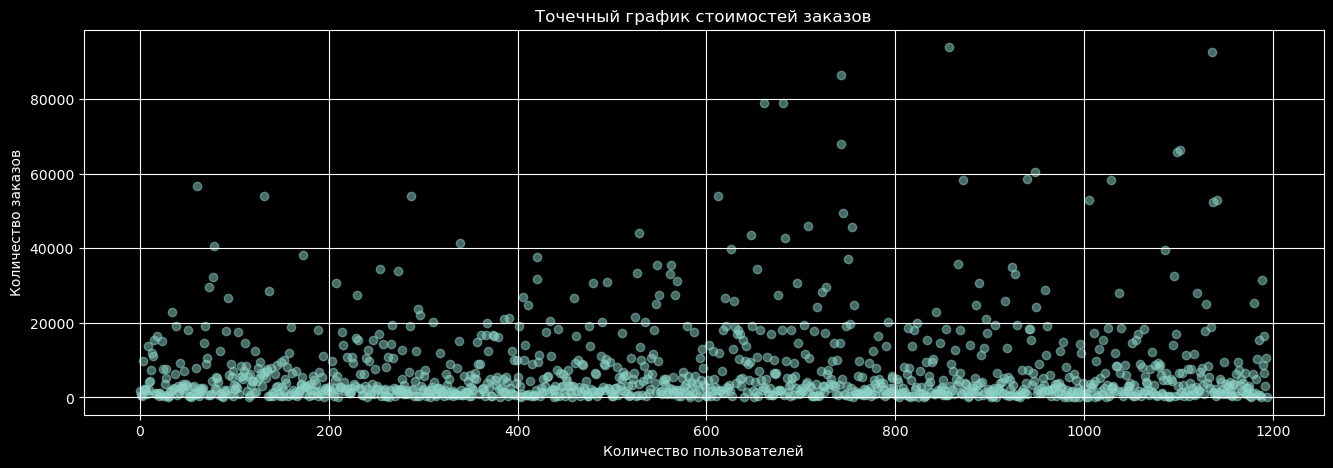

In [58]:
plt.figure(figsize=(16,5)) 
plt.grid()
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Количество пользователей')
plt.ylabel('Количество заказов')
plt.ticklabel_format(style='plain') 

filtered_orders = df_orders.query('revenue <= 200000') 
x_values = pd.Series(range(0,len(filtered_orders))) 
plt.scatter(x_values, filtered_orders['revenue'], alpha = 0.5) 
plt.show()




 Большинство заказов не дороже 20000 рублей. Можно заметить, что количество пользователей, совершающих заказ становится меньше с увеличением стоимости заказов.

## 17 3.9  Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов. 

In [59]:
print(np.percentile(df_orders['revenue'], [95,99])) 

[28000.  58233.2]


Видим, что у не более чем 5 % заказов чек превышает 28000 рублей и у не более чем 1 % заказов чек превышает 58233.2 рублей  

За границу определения аномальных заказов выберем заказы, чек которых превышает 58233 рублей. 

## 18 3.10 Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделаем выводы и предположения.

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по 'сырым' данным. Подготовим данные.

In [60]:
# отберем случайным образом 10 строк
df_visitors.sample(n=10, random_state =1)  

,date,group,visitors
21,2019-08-22,A,609
52,2019-08-22,B,650
38,2019-08-08,B,654
24,2019-08-25,A,621
2,2019-08-03,A,507
41,2019-08-11,B,721
60,2019-08-30,B,490
50,2019-08-20,B,560
35,2019-08-05,B,707
44,2019-08-14,B,746


In [61]:
# отберем случайным образом 10 строк
df_orders.sample(n=10, random_state = 1)  

,transaction_Id,visitor_Id,date,revenue,group
886,51443164,4278982564,2019-08-05,24744,A
1093,3894437543,276558944,2019-08-12,5050,A
801,504373597,2604012846,2019-08-05,890,B
189,4189935502,1648269707,2019-08-17,290,B
808,2344401705,366673373,2019-08-05,1460,A
480,1954636284,2600415354,2019-08-06,1530,B
202,532398042,1306302251,2019-08-23,1498,A
311,3567356314,3077396270,2019-08-24,4195,B
866,707525727,1270030113,2019-08-30,3290,B
752,237002862,1398592185,2019-08-20,390,A


In [62]:
visitorsADaily = df_visitors[df_visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}), axis=1)

visitorsACummulative.columns = ['date', 'visitorsCummulativeA'] 

visitorsBDaily = df_visitors[df_visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB'] 

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}), axis = 1)

visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']




In [63]:
ordersADaily = (
    df_orders[df_orders['group'] == 'A'][['date', 'transaction_Id', 'visitor_Id','revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_Id': pd.Series.nunique, 'revenue': 'sum'})) 

ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']


ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}), axis = 1) .sort_values(by=['date'])

ordersACummulative.columns = ['date','ordersCummulativeA','revenueCummulativeA']

ordersBDaily = (
    df_orders[df_orders['group'] == 'B'][['date', 'transaction_Id', 'visitor_Id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_Id': pd.Series.nunique, 'revenue': 'sum'}))

ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply( 
      lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
         {'date': 'max', 'ordersPerDateB' : 'sum', 'revenuePerDateB': 'sum'}), axis = 1).sort_values(by=['date'])


ordersBCummulative.columns = ['date','ordersCummulativeB','revenueCummulativeB']



In [64]:
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)


In [65]:
# выведем первые 10 строк нового датафрейма data
data.head(10)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280
5,2019-08-06,18,48484,28,242342,127,598401,129,824337,667,655,3985,3935
6,2019-08-07,18,142417,24,225334,145,740818,153,1049671,644,709,4629,4644
7,2019-08-08,16,96279,27,220918,161,837097,180,1270589,610,654,5239,5298
8,2019-08-09,16,188506,25,160812,177,1025603,205,1431401,617,610,5856,5908
9,2019-08-10,16,210495,23,107802,193,1236098,228,1539203,406,369,6262,6277


    Напомним названия столбцов данных: 
        
    * date — дата;
    * ordersPerDateA — количество заказов в выбранную дату в группе A;
    * revenuePerDateA — суммарная выручка в выбранную дату в группе A;
    * ordersPerDateB — количество заказов в выбранную дату в группе B;
    * revenuePerDateB — суммарная выручка в выбранную дату в группе B;
    * ordersCummulativeA — суммарное число заказов до выбранной даты включительно в группе A;
    * revenueCummulativeA — суммарная выручка до выбранной даты включительно в группе A;
    * ordersCummulativeB — суммарное количество заказов до выбранной даты включительно в группе B;
    * revenueCummulativeB — суммарная выручка до выбранной даты включительно в группе B;
    * visitorsPerDateA — количество пользователей в выбранную дату в группе A;
    * visitorsPerDateB — количество пользователей в выбранную дату в группе B;
    * visitorsCummulativeA  — количество пользователей до выбранной даты включительно в группе A;
    * visitorsCummulativeB — количество пользователей до выбранной даты включительно в группе B.

Теперь посчитаем статистическую значимость различия в среднем количестве заказов между группами.  

Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['user_Id', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершенных заказов. 

In [66]:
ordersByUsersA = (df_orders[df_orders['group'] == 'A'].groupby('visitor_Id', as_index=False)
                  .agg({'transaction_Id': pd.Series.nunique}))
ordersByUsersA.columns = ['user_Id', 'orders'] 
ordersByUsersA.head() 

,user_Id,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1


In [67]:

ordersByUsersB = (df_orders[df_orders['group'] == 'B'].groupby('visitor_Id', as_index=False)
                  .agg({'transaction_Id': pd.Series.nunique})) 

ordersByUsersB.columns = ['user_Id', 'orders'] 
ordersByUsersB.head()

,user_Id,orders
0,5114589,1
1,6958315,1
2,8300375,1
3,39475350,1
4,47206413,1


     Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это необходимо,  чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [68]:
sampleA = pd.concat([ordersByUsersA['orders'], pd.Series(0, index = np.arange(data['visitorsPerDateA'].sum() 
                    - len(ordersByUsersA['orders'])), name ='orders')], axis = 0)

sampleB = pd.concat([ordersByUsersB['orders'], pd.Series(0, index = np.arange(data['visitorsPerDateB'].sum() 
                    - len(ordersByUsersB['orders'])), name ='orders')], axis = 0)

 

Сформулируем гипотезы.

Нулевая H0 - статистически значимых  различий  в среднем количестве заказов между группами нет

Альтернативная H1 - статистически значимые  различия в среднем количестве заказов  между группами есть 

В качестве уровня статистической значимости alpha примем значение 0.05

In [69]:
# Применим критерий и отформатируем p-value, округлив его до трёх знаков после запятой 

# уровень статистической значимости 

alpha = 0.05 

print('p_value: = {0:.3f}'.format(stats.mannwhitneyu(sampleA, sampleB, alternative = 'two-sided')[1])) 
print('Относительный прирост группы B по отношению к группе A: = {0:.3f}'.format(sampleB.mean() / sampleA.mean() - 1))

p_value: = 0.017
Относительный прирост группы B по отношению к группе A: = 0.138


      Первое число - p_value = 0.017 меньше 0.05.  Значит, на уровне статистической значимости 5 % есть основания отвергнуть нулевую гипотезу о том, что статистически значимых различий в среднем количестве заказов между группами нет в пользу альтернативы. Таким образом принимаем альтернативную гипотезу: между группами A и B есть статистически значимые различия в среднем количестве заказов.
      Относительный выигрыш группы B равен 13.8 % - второе число в выводе. 

## 19 3.11 Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделаем выводы и предположения.

Теперь проверим статистическую значимость различий в среднем чеке между группами A и B.

Cформулируем гипотезы.

Нулевая гипотеза (H0): 'статиcтически значимых различий в среднем чеке между группами нет'

Альтернативная гипотеза (H1) : ' есть статистически значимые различия в среднем чеке между группами'

В качестве уровня статистической значимости alpha примем значение 0.05

Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов. 
А ещё найдём относительные различия в среднем чеке между группами:

In [70]:
# Применим критерий и отформатируем p-value, округлив его до трёх знаков после запятой  

# уровень статистической значимости 

alpha = 0.05 

print('p_value: = {0:.3f}'.format(stats.mannwhitneyu(df_orders[df_orders['group']=='A']['revenue'], df_orders[df_orders['group']=='B']['revenue'])[1]))
print('Относительное различие в среднем чеке между группами: = {0:.3f}'.format(df_orders[df_orders['group'] == 'B']['revenue'].mean()/ df_orders[df_orders['group'] =='A']['revenue'].mean()-1))

p_value: = 0.729
Относительное различие в среднем чеке между группами: = 0.259


Первое число в выводе - 0.729 . P_value значительно превышает 0.05.  
Следовательно, на уровне статистической значимости 5 % причин отвергать нулевую гипотезу в пользу альтернативы нет. Таким образом, статитистически значимых различий в среднем чеке между группами нет. Второе число в выводе - 0.259. Средний чек группы B превышает средний чек группы A на 26 %. 

##  20 3.12   Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделаем выводы и предположения.  

 Приступим к подготовке очищенных от аномалий данных. В прошлых  шагах исследования мы определили, что 95-й и 99-й перцентили средних чеков равны 28000 и 58233 рублям. Аналогично 95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4 заказа на пользователя. 
 
 Примем за аномальных пользователей тех, кто совершил от 4 заказов или совершил заказ дороже 58233 рублей. 
 
   Сделаем срезы пользователей с числом заказов больше 4 — usersWithManyOrders и пользователей, совершивших заказы дороже 58 233 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers. 

In [71]:
 # Узнаем сколько всего аномальных пользователей атрибутом shape: 
    
usersWithManyOrders = pd.concat(
           [ordersByUsersA[ordersByUsersA['orders'] > (np.percentile(ordersByUsers['orders'], 99))]['user_Id'], 
            ordersByUsersB[ordersByUsersB['orders'] > (np.percentile(ordersByUsers['orders'], 99))]['user_Id'],
                               
           ],axis=0,
        ) 
    
usersWithExpensiveOrders = df_orders[df_orders['revenue'] > (np.percentile(df_orders['revenue'], 99))]['visitor_Id'] 
abnormalUsers = (pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0)
                    .drop_duplicates().sort_values()) 


print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 
            


1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
dtype: int64
15


Всего 15 аномальных пользователей. Узнаем, как их действия повлияли на результаты теста. 

Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста: 

In [72]:
sampleAFiltered = pd.concat( 
    [ ordersByUsersA[np.logical_not(ordersByUsersA['user_Id'].isin(abnormalUsers))]['orders'], 
    pd.Series(0, index = np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name = 'orders',),
    ], axis=0,) 


sampleBFiltered = pd.concat( 
    [ ordersByUsersB[np.logical_not(ordersByUsersB['user_Id'].isin(abnormalUsers))]['orders'], 
    pd.Series(0, index = np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name = 'orders',),
    ], axis=0,) 



Сформулируем гипотезы.

Нулевая H0 - статистически значимых различий в среднем количестве заказов между группами нет

Альтернативная H1 - статистически значимые различия в среднем количестве заказов между группами есть

Применим статистический критерий Манна-Уитни к полученным выборкам: 

In [73]:
print('alpha = ', 0.05)
print('p_value: = {0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered, alternative = 'two-sided')[1])) 
print('Относительный прирост группы B по отношению к группе A: = {0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

alpha =  0.05
p_value: = 0.014
Относительный прирост группы B по отношению к группе A: = 0.153


Первое число в выводе - 0.05. Это уровень статистической значимости alpha. 

Второе число в выводе p_value = 0.014 меньше 0.05. Следовательно, на уровне статистической значимости 5 %  есть основания отвергнуть нулевую гипотезу в пользу альтернативы. Таким образом, есть статистически значимые различия в среднем количестве заказов между группами. 

Третье число в выводе - 0.153. Это значит, что относительный прирост группы B по отношению к группе A составил 15.3 %. Это выше данного показателя с 'сырыми' данными(13.8 %).

## 21 3.13  Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделаем выводы и предположения.

Приступим к подготовке очищенных от аномалий данных. Сформулируем гипотезы: 
    
Нулевая гипотеза (Н0): "статистически значимых различий в среднем чеке заказа между группами нет"

Альтернативная гипотеза: (H1): "статистически значимые различия в среднем чеке заказа между группами есть" 
        

In [74]:
# Применим статистический критерий Манна-Уитни к полученным выборкам 

print('alpha =', 0.05) 
print('p_value = {0:.3f}'.format(stats.mannwhitneyu(df_orders[np.logical_and(df_orders['group'] == 'A',
                                 np.logical_not(df_orders['visitor_Id'].isin(abnormalUsers)),
                         )]['revenue'], df_orders[np.logical_and(df_orders['group'] == 'B', 
                         np.logical_not(df_orders['visitor_Id'].isin(abnormalUsers)), 
                         )]['revenue'], )[1]))
print('Относительный прирост группы B по отношению к группе A: = {0:.3f}'.format(df_orders[np.logical_and(df_orders['group'] =='B' 
     ,np.logical_not(df_orders['visitor_Id'].isin(abnormalUsers)), 
     )]['revenue'].mean()/df_orders[np.logical_and(df_orders['group'] == 'A', np.logical_not(df_orders['visitor_Id']
     .isin(abnormalUsers)),)]['revenue'].mean() -1))

alpha = 0.05
p_value = 0.851
Относительный прирост группы B по отношению к группе A: = -0.006


Получившееся значение p_value > alpha (0.851 > 0.05). Следовательно, на уровне статистической значимости 5 % нет оснований отвергать нулевую гипотезу в пользу альтернативы. 

Таким образом, статистически значимых различий в среднем чеке между группами нет. 
После 'очищенных данных' cредний чек группы B оказался ниже среднего чека группы A на 0.6 %.  По 'сырым' же данным средний чек группы B превышал средний чек группы A на 26 %. Видим, что на результаты теста огромное влияние оказывают аномальные заказы с большими суммами.

## 22 3.14 Примем решение по результатам теста и объясним его. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.

Имеющиеся факты: 

  1)  есть статистически значимые различия по среднему количеству заказов между группами как по «сырым», так и  по данным после фильтрации аномалий; 
  
  2)  нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий; 

 Среднее количество заказов группы B по отношению к группе A на 13.8 % выше по "сырым" данным и на 15.3 % выше по "очищенным" данным. 

 Средние чеки групп A И B по 'очищенным' данным равны. 
 
 Принимая во внимание результаты проведенного A/B теста, рекомендую остановить тест и зафиксировать победу группы B. 
 Отделу маркетинга  следует поработать над возможным увеличением среднего чека. 